# 1. MNIST - TensorFlow

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

## Загружаем данные

In [2]:
mnist = input_data.read_data_sets('/tmp/data', one_hot=True)

Xtrain = mnist.train.images
ytrain = mnist.train.labels
Xtest = mnist.test.images
ytest = mnist.test.labels

N_PIXELS = 28 * 28
N_CLASSES = 10
HIDDEN_SIZE = 64
EPOCHS = 20
BATCH_SIZE = 64

sess = tf.Session()

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


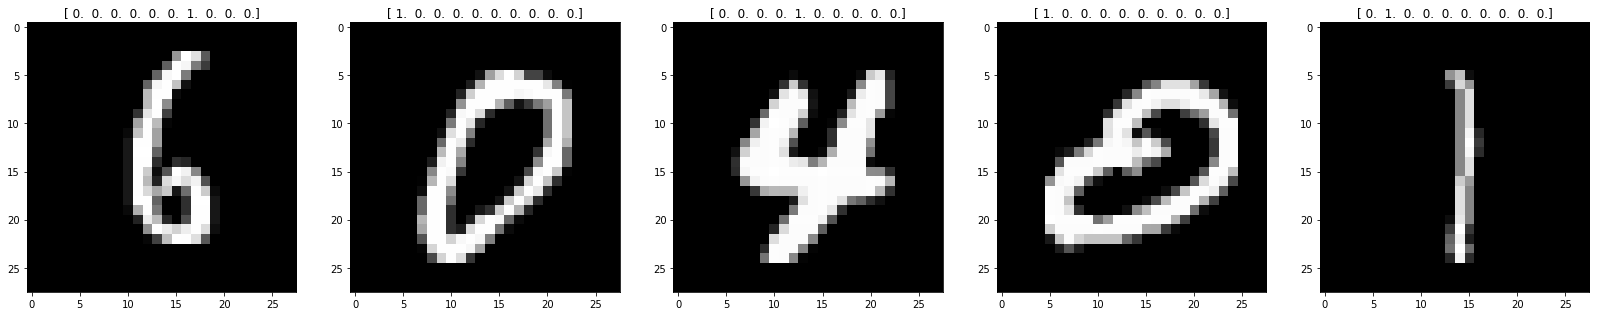

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

n_images = 5
ind = np.random.choice(len(Xtrain), n_images)
f, axarr = plt.subplots(1, n_images, figsize=(28,28))
for i in range(n_images):
    axarr[i].imshow(Xtrain[ind[i]].reshape((28,28)), cmap=plt.cm.gray)
    axarr[i].set_title('%s' % ytrain[ind[i]])

## Инициализируем placeholder'ы для данных

In [5]:
x = tf.placeholder(tf.float32, [None, N_PIXELS], name="pixels")
y_label = tf.placeholder(tf.float32, [None, N_CLASSES], name="labels")

## Инициализирем архитектуру сети

In [6]:
W1 = tf.Variable(tf.truncated_normal([N_PIXELS, HIDDEN_SIZE],
                                     stddev=N_PIXELS**-0.5))
b1 = tf.Variable(tf.zeros([HIDDEN_SIZE]))

hidden = tf.nn.sigmoid(tf.matmul(x, W1) + b1)

In [7]:
W2 = tf.Variable(tf.truncated_normal([HIDDEN_SIZE, N_CLASSES],
                                     stddev=HIDDEN_SIZE**-0.5))
b2 = tf.Variable(tf.zeros([N_CLASSES]))

y = tf.matmul(hidden, W2) + b2

## Задаем функцию потерь и метрику качества

In [8]:
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_label))

In [9]:
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, 1),
                                           tf.argmax(y_label, 1)),
                                  tf.float32))

## Запускаем обучение сети

In [14]:
sgd = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
sess.run(tf.global_variables_initializer())
inds = list(range(Xtrain.shape[0]))

for i in range(EPOCHS):
    np.random.shuffle(inds)
    for j in range(0, len(inds), BATCH_SIZE):
        sess.run(sgd, feed_dict={x: Xtrain[inds[j:j+BATCH_SIZE]],
                                 y_label: ytrain[inds[j:j+BATCH_SIZE]]})
    
    print(sess.run([loss, accuracy], feed_dict={x: Xtest, y_label: ytest}))

[0.27419215, 0.91860002]
[0.20244446, 0.94069999]
[0.16198495, 0.95050001]
[0.14283413, 0.95850003]
[0.1352001, 0.9594]
[0.12985417, 0.9612]
[0.10671704, 0.9677]
[0.10480923, 0.96780002]
[0.097900063, 0.97140002]
[0.093541428, 0.97149998]
[0.091937974, 0.97119999]
[0.087621689, 0.97299999]
[0.087374538, 0.97420001]
[0.094211467, 0.9716]
[0.085480906, 0.97469997]
[0.086175852, 0.9734]
[0.083629392, 0.9745]
[0.081091888, 0.97500002]
[0.081647724, 0.97469997]
[0.08058843, 0.97530001]


## Испольем tf.layers для инициализации слоев

In [15]:
hidden = tf.layers.dense(x, HIDDEN_SIZE,
                         activation=tf.nn.sigmoid,
                         use_bias=True,
                         kernel_initializer=tf.truncated_normal_initializer(stddev=N_PIXELS**-0.5))

In [16]:
y = tf.layers.dense(hidden, N_CLASSES,
                    activation=None,
                    use_bias=True,
                    kernel_initializer=tf.truncated_normal_initializer(stddev=HIDDEN_SIZE**-0.5))

In [17]:
loss = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=y, labels=y_label))
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(y, 1),
                                           tf.argmax(y_label, 1)),
                                  tf.float32))

In [20]:
sgd = tf.train.GradientDescentOptimizer(0.5).minimize(loss)
sess.run(tf.global_variables_initializer())
inds = list(range(Xtrain.shape[0]))

for i in range(EPOCHS):
    np.random.shuffle(inds)
    for j in range(0, len(inds), BATCH_SIZE):
        sess.run(sgd, feed_dict={x: Xtrain[inds[j:j+BATCH_SIZE]],
                                 y_label: ytrain[inds[j:j+BATCH_SIZE]]})
    
    print(sess.run([loss, accuracy], feed_dict={x: Xtest, y_label: ytest}))

[0.25981373, 0.92500001]
[0.20735918, 0.93910003]
[0.15981436, 0.95099998]
[0.13998252, 0.95829999]
[0.13856152, 0.95749998]
[0.11754297, 0.96270001]
[0.1199107, 0.96340001]
[0.099365763, 0.96960002]
[0.099747203, 0.97039998]
[0.090783633, 0.97189999]
[0.11230276, 0.96390003]
[0.090827942, 0.972]
[0.091741115, 0.97189999]
[0.083837844, 0.97430003]
[0.086600326, 0.97189999]
[0.08193659, 0.97439998]
[0.083111331, 0.97329998]
[0.079942405, 0.97570002]
[0.079861477, 0.97589999]
[0.079603352, 0.97490001]


# 2. MNIST - LogReg

In [13]:
import numpy as np
from sklearn.datasets import fetch_mldata
from sklearn.metrics import classification_report, accuracy_score

In [3]:
mnist = fetch_mldata('MNIST original', data_home='/tmp/sklearn')
X, y = mnist['data'], mnist['target']

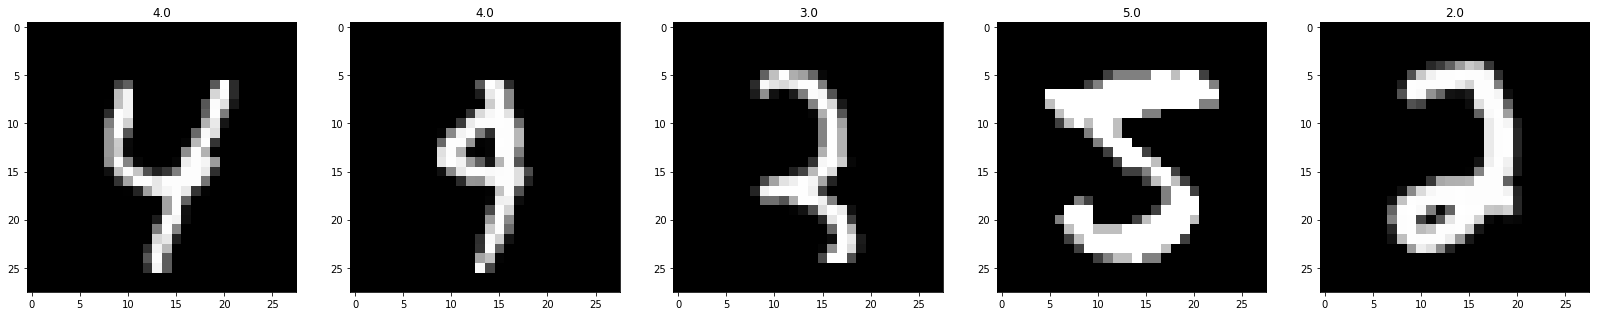

In [4]:
%matplotlib inline
from matplotlib import pyplot as plt

n_images = 5
ind = np.random.choice(len(X), n_images)
f, axarr = plt.subplots(1, n_images, figsize=(28,28))
for i in range(n_images):
    axarr[i].imshow(X[ind[i]].reshape((28,28)), cmap=plt.cm.gray)
    axarr[i].set_title('%s' % y[ind[i]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=12345)

In [6]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [7]:
from sklearn.linear_model import LogisticRegression
model_logreg = LogisticRegression(multi_class='multinomial', solver='sag').fit(X_train_pca, y_train)

In [17]:
print('accuracy =', accuracy_score(y_test, model_logreg.predict(X_test_pca)))
print(classification_report(y_test, model_logreg.predict(X_test_pca)))

accuracy = 0.9106
             precision    recall  f1-score   support

        0.0       0.94      0.96      0.95      3455
        1.0       0.93      0.97      0.95      3926
        2.0       0.92      0.90      0.91      3441
        3.0       0.92      0.87      0.90      3529
        4.0       0.90      0.93      0.91      3399
        5.0       0.88      0.84      0.86      3185
        6.0       0.93      0.95      0.94      3498
        7.0       0.92      0.93      0.92      3633
        8.0       0.88      0.85      0.86      3471
        9.0       0.88      0.89      0.88      3463

avg / total       0.91      0.91      0.91     35000



# 3. MNIST - SVM

In [8]:
from sklearn.svm import LinearSVC
model_svc = LinearSVC().fit(X_train_pca, y_train)

In [16]:
print('accuracy =', accuracy_score(y_test, model_svc.predict(X_test_pca)))
print(classification_report(y_test, model_svc.predict(X_test_pca)))

accuracy = 0.801485714286
             precision    recall  f1-score   support

        0.0       0.91      0.79      0.85      3455
        1.0       0.86      0.96      0.91      3926
        2.0       0.83      0.78      0.80      3441
        3.0       0.77      0.80      0.78      3529
        4.0       0.71      0.92      0.80      3399
        5.0       0.73      0.69      0.71      3185
        6.0       0.92      0.82      0.87      3498
        7.0       0.81      0.85      0.83      3633
        8.0       0.71      0.74      0.73      3471
        9.0       0.80      0.63      0.71      3463

avg / total       0.81      0.80      0.80     35000

